Deep Learning Cohort1.0
Name: Bilqisu Ismail
Email: ismail.bilkisu@gmail.com
Title: Week 3 Solution

In [ ]:
# Import torch
import torch
from torch import nn
# Setup device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
device
# Setup random seed

RANDOM_SEED = 42
torch.manual_seed(42)

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [ ]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_moons(n_samples,
                    noise=0.03,
                    random_state=42)
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 [ 0.41276802 -0.37638459]
 [-0.84532016  0.52879908]]

First 5 y labels:
[1 1 1 1 0]


In [ ]:
# Turn data into a DataFrame
import pandas as pd
moons = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
moons.head(10)

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
5,0.579542,-0.352979,1
6,0.294884,-0.209238,1
7,-0.014488,0.435896,1
8,1.626510,-0.281207,1
9,0.671598,0.786422,0


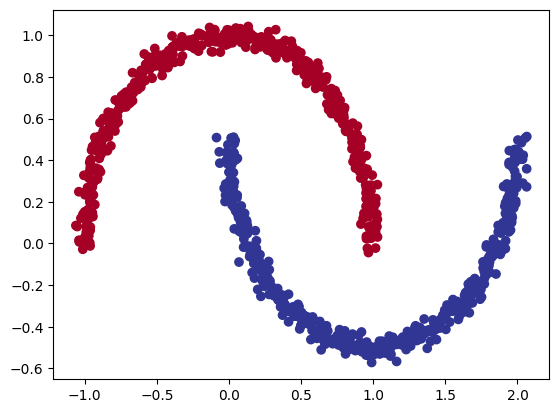

In [ ]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
# Turn data into tensors of dtype float
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    def forward(self, x):
        ## Your code here ##
        return self.layer_2(self.layer_1(x))


# Instantiate the model
## Your code here ##
model_0 = MoonModelV0().to(device)
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [ ]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
# What's coming out of our model?
y_logits = model_0(X_test.to(device))[:5]
# logits (raw outputs of model)
print(f"Logits: {y_logits}")

## Your code here ##
y_pred_probs = torch.sigmoid(y_logits)
# Prediction probabilities
print(f"Pred probs: {y_pred_probs}")

## Your code here ##
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()
# Prediction labels
print(f"Pred labels: {y_pred_labels}")
## Your code here ##

Logits: tensor([[-0.1435],
        [-0.0799],
        [-0.1176],
        [-0.0775],
        [-0.0713]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred probs: tensor([[0.4642],
        [0.4800],
        [0.4706],
        [0.4806],
        [0.4822]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([True, True, True, True, True], device='cuda:0')
Pred labels: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)


In [ ]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [ ]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs =100

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass (logits output)
  # Turn logits into prediction probabilities

  y_logits = model_0(X_train).squeeze()
  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

  # 2. Calculaute the loss
  # loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)

  # Calculate the accuracy
  # acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels
  acc = acc_fn(y_train, y_pred)
  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test).squeeze()
    # Turn the test logits into prediction labels
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits,
                       y_test)
    test_acc = acc_fn(y_test, test_pred)

  # Print out what's happening every 100 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69395, Accuracy: 0.50% | Test loss: 0.68147, Test acc: 0.58%
Epoch: 10 | Loss: 0.57149, Accuracy: 0.79% | Test loss: 0.57350, Test acc: 0.75%
Epoch: 20 | Loss: 0.48652, Accuracy: 0.81% | Test loss: 0.49746, Test acc: 0.79%
Epoch: 30 | Loss: 0.42603, Accuracy: 0.82% | Test loss: 0.44278, Test acc: 0.81%
Epoch: 40 | Loss: 0.38463, Accuracy: 0.82% | Test loss: 0.40451, Test acc: 0.81%
Epoch: 50 | Loss: 0.35657, Accuracy: 0.83% | Test loss: 0.37765, Test acc: 0.81%
Epoch: 60 | Loss: 0.33707, Accuracy: 0.83% | Test loss: 0.35814, Test acc: 0.81%
Epoch: 70 | Loss: 0.32288, Accuracy: 0.84% | Test loss: 0.34328, Test acc: 0.81%
Epoch: 80 | Loss: 0.31201, Accuracy: 0.84% | Test loss: 0.33141, Test acc: 0.82%
Epoch: 90 | Loss: 0.30329, Accuracy: 0.85% | Test loss: 0.32152, Test acc: 0.83%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [ ]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

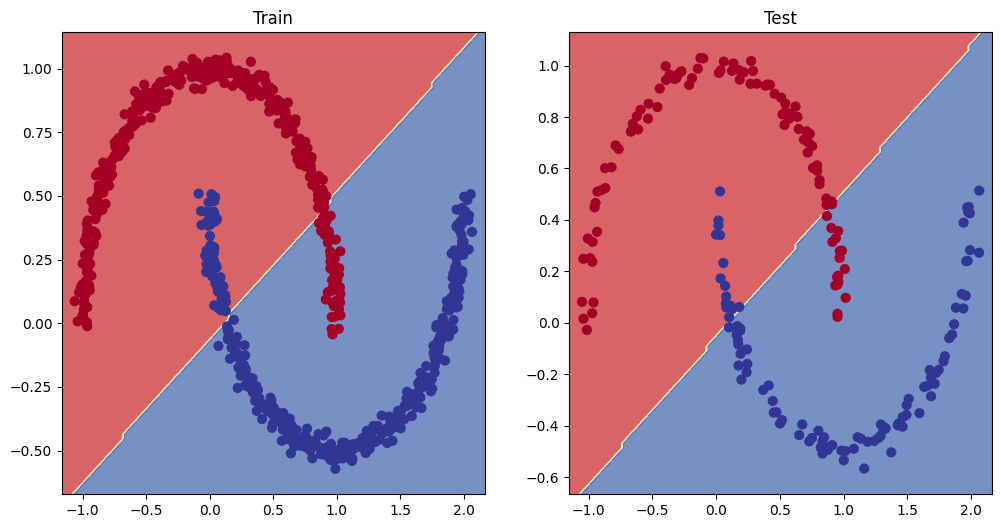

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [ ]:
# Create a straight line tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [ ]:
# Test torch.tanh() on the tensor and plot it
torch.tanh(A)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9993, -0.9951,
        -0.9640, -0.7616,  0.0000,  0.7616,  0.9640,  0.9951,  0.9993,  0.9999,
         1.0000,  1.0000,  1.0000,  1.0000])

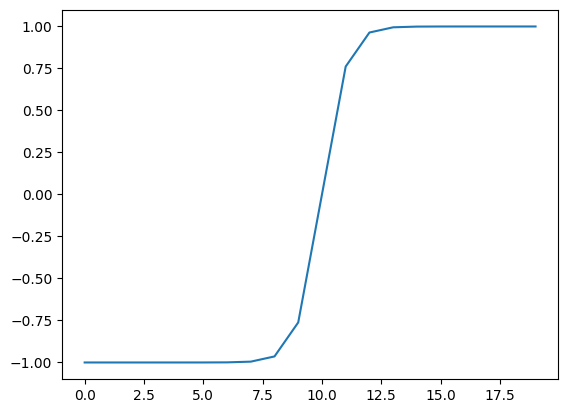

In [ ]:
# Replicate torch.tanh() and plot it
plt.plot(torch.tanh(A));

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

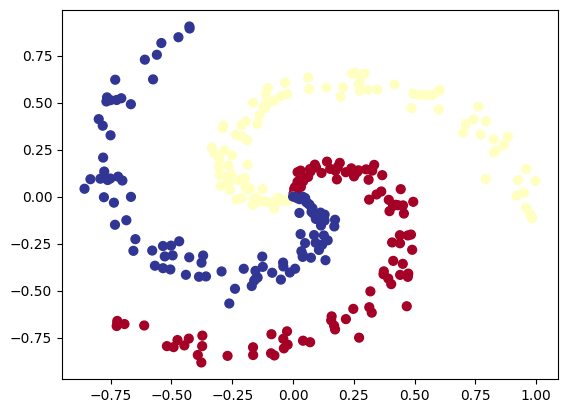

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42)

In [ ]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [ ]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class SpiralModelV1(nn.Module):
    ## Your code here ##
      def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
      def forward(self, x):
        ## Your code here ##
        return self.linear_layer_stack(x)


# Instantiate the model
## Your code here ##
model_1 = SpiralModelV1(input_features=D,
                    output_features=N,
                    hidden_units=8).to(device)



# Instantiate model and send it to device
model_1

SpiralModelV1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=100, bias=True)
  )
)

In [ ]:
# Setup data to be device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Print out first 10 untrained model outputs (forward pass)
y_logits = model_1(X_test.to(device))[:5]

print(f"Logits: {y_logits}")

## Your code here ##
y_pred_probs = torch.sigmoid(y_logits)
print(f"Pred probs: {y_pred_probs}")

## Your code here ##
y_preds = torch.round(y_pred_probs)
# In full
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

# Prediction labels
print(f"Pred labels: {y_pred_labels}")

## Your code here ##

Logits: tensor([[-0.2424, -0.3141, -0.2072, -0.1096,  0.2737,  0.4129,  0.5049,  0.1019,
         -0.3706,  0.0619, -0.0727,  0.0265, -0.1514,  0.1191, -0.4309,  0.3056,
          0.2807,  0.2767,  0.0080,  0.0761, -0.0906,  0.3207,  0.1336, -0.3760,
         -0.4484,  0.2670, -0.0269,  0.2832,  0.6301,  0.1669,  0.0971,  0.2060,
         -0.4864,  0.1940,  0.6218, -0.3953, -0.1372, -0.2157,  0.0083,  0.1219,
         -0.3260, -0.0050,  0.1714, -0.1757, -0.6004,  0.1792, -0.3217, -0.3773,
         -0.4499,  0.0017, -0.4903, -0.2453, -0.4857,  0.1920, -0.1615,  0.0201,
          0.0275,  0.0494,  0.0981, -0.1782, -0.4356, -0.3137,  0.3302,  0.0859,
         -0.3026,  0.0426, -0.2188, -0.1684, -0.1534,  0.1195, -0.0224, -0.2805,
         -0.0878, -0.1327,  0.3221,  0.2472, -0.1023, -0.2774,  0.6839, -0.0893,
         -0.1575,  0.2623,  0.1244,  0.6320,  0.3389, -0.0820,  0.1086, -0.2011,
         -0.4136, -0.1497, -0.0887,  0.1252,  0.4133, -0.2681, -0.2015,  0.2404,
         -0.1464, -0

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)


In [ ]:
# Build a training loop for the model
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
# Loop over data
for epoch in range(epochs):

  ## Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train) # model outputs raw logits
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  # 2. Calculate the loss

  loss = loss_fn(y_logits, y_train)
  acc= acc_fn(y_train, y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step

  optimizer.step()
  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc= acc_fn(y_test, test_pred)
  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 4.87034, Acc: 0.00% | Test Loss: 4.74801, Test Acc: 0.00%
Epoch: 100 | Loss: 0.85171, Acc: 0.50% | Test Loss: 0.87223, Test Acc: 0.47%
Epoch: 200 | Loss: 0.74747, Acc: 0.50% | Test Loss: 0.76331, Test Acc: 0.50%
Epoch: 300 | Loss: 0.74493, Acc: 0.50% | Test Loss: 0.76045, Test Acc: 0.50%
Epoch: 400 | Loss: 0.74464, Acc: 0.50% | Test Loss: 0.76010, Test Acc: 0.50%
Epoch: 500 | Loss: 0.74447, Acc: 0.50% | Test Loss: 0.75992, Test Acc: 0.50%
Epoch: 600 | Loss: 0.74437, Acc: 0.50% | Test Loss: 0.75980, Test Acc: 0.50%
Epoch: 700 | Loss: 0.74429, Acc: 0.50% | Test Loss: 0.75972, Test Acc: 0.50%
Epoch: 800 | Loss: 0.74424, Acc: 0.50% | Test Loss: 0.75965, Test Acc: 0.50%
Epoch: 900 | Loss: 0.74419, Acc: 0.50% | Test Loss: 0.75961, Test Acc: 0.50%


helper_functions.py already exists, skipping download


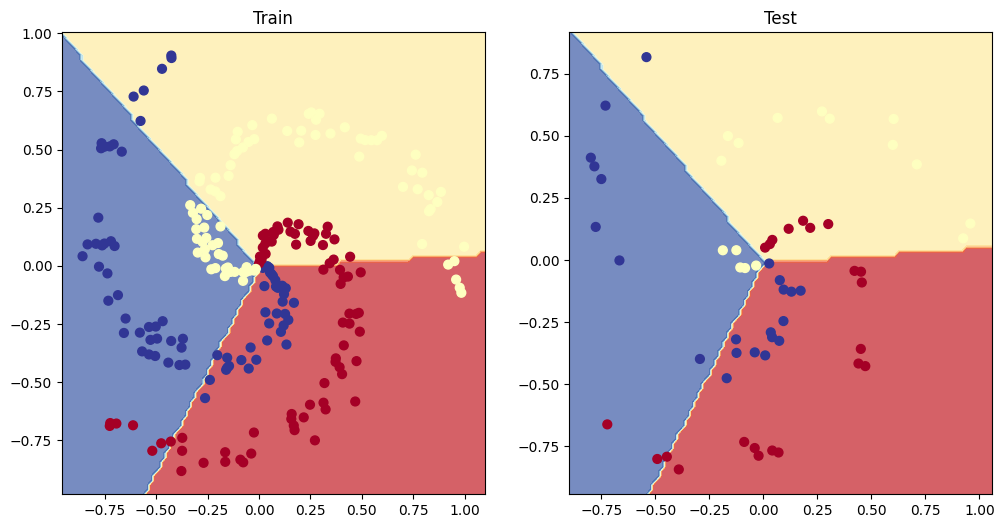

In [ ]:
# Plot decision boundaries for training and test sets
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
